<a href="https://colab.research.google.com/github/dltnqls9788/AI-YangJaeHub/blob/main/CNN_fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
def load_fashion_mnist():
    (train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

    # 이미지 픽셀의 0~1 되도록 정규화 
    train_X = train_X / 255.0
    test_X = test_X / 255.0

    # dims 확장한다. 맨 뒤에 
    train_X = np.expand_dims(train_X, axis=-1)
    test_X = np.expand_dims(test_X, axis=-1)

    # 0-9 레이블을 one-hot label로 바꾸기 
    train_y = to_categorical(train_y, num_classes=10)
    test_y = to_categorical(test_y, num_classes=10) 


    return train_X, train_y, test_X, test_y

In [ ]:
def build_cnn_model(num_classes, input_shape):
  model=Sequential()
  model.add(Input(shape=input_shape))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(MaxPool2D())

  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(MaxPool2D())

  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(GlobalAveragePooling2D())

  model.add(Dense(units=128, activation='relu'))
  model.add(Dense(units=num_classes, activation='softmax'))

  return model

In [ ]:
def plot_loss(hist):
  plt.plot(hist.history['loss'], 'b-', label='loss')
  plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
  plt.xlabel('Epoch')
  plt.legend()

In [ ]:
def plot_accuracy(hist):
  plt.plot(hist.history['accuracy'], 'g-', label='accuracy')
  plt.plot(hist.history['val_accuracy'], 'r--', label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylim(0.7, 1)
  plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

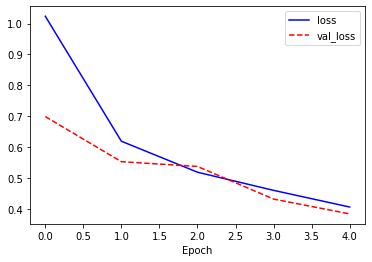

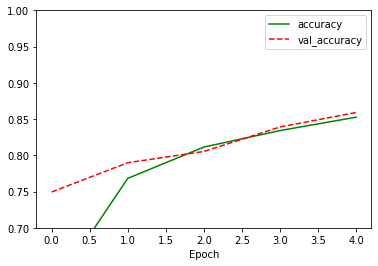

In [ ]:
def main(cnn_model=None, epochs=5):
  train_X, train_y, test_X, test_y = load_fashion_mnist()
  # print('train_y[0]', train_y[0])
  # print('train_X[0].shape', train_X[0].shape)

  num_classes = len(train_y[0])
  input_shape = train_X[0].shape

  cnn_model = build_cnn_model(num_classes, input_shape)
  print(cnn_model.summary())

  cnn_model.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
  
  history = cnn_model.fit(train_X, train_y, batch_size=256, epochs=epochs, validation_split=0.25, shuffle=True)

  test_loss, test_accuracy = cnn_model.evaluate(test_X, test_y)
  print(f"테스트 정확도: {test_accuracy * 100:.3f}%")

  plot_loss(history)
  plt.show()

  plot_accuracy(history)
  plt.show()

main()